# A Wide and Deep Network for the California Housing Problem

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

## Get the data

In [2]:
housing = fetch_california_housing()

### Create train, validation and test sets

In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [5]:
X_train.shape

(11610, 8)

In [6]:
X_test.shape

(5160, 8)

In [7]:
X_valid.shape

(3870, 8)

### Scale the data

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [9]:
X_train.shape[1:]

(8,)

### Split the data further into different subsets

In [10]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

In [11]:
X_train_A.shape

(11610, 5)

In [12]:
X_train_B.shape

(11610, 6)

## Create the model

We create a model with two input layers. In our scenario, we only feed different subsets of features into the two input layers. Input layer A is directly connected to a concatenate layer (the *wide* part), while input layer B is fed into two subsequent hidden layers 1 and 2 (the *deep* part), with the latter connecting to the concatenate layer as well. From the concatenate layer, the main output is generated. As an additional output, the auxiliary output layer is generated from hidden layer 2.<br>
The auxiliary output layer can be used to make sure that the deep part of the network trains some useful features on its own, without relying on the wide part.

In [13]:
input_A = keras.layers.Input(shape=X_train_A.shape[1:], name='wide_input')
input_B = keras.layers.Input(shape=X_train_B.shape[1:], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu', name='hidden_1')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu', name='hidden_2')(hidden1)
concat = keras.layers.Concatenate(name='wide_concat')([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [14]:
model.compile(
    loss=['mse', 'mse'],
    loss_weights=[0.9, 0.1],
    optimizer=keras.optimizers.SGD(lr=5e-3),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error']
)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
hidden_1 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
hidden_2 (Dense)                (None, 30)           930         hidden_1[0][0]                   
______________________________________________________________________________________________

## Train the model

In [16]:
history = model.fit(
    {'wide_input': X_train_A, 'deep_input': X_train_B},
    {'main_output': y_train, 'aux_output': y_train},
    epochs=150,
    validation_data=(
        {'wide_input': X_valid_A, 'deep_input': X_valid_B},
        {'main_output': y_valid, 'aux_output': y_valid}
    )
)

Epoch 1/150
363/363 [==============================] - 2s 3ms/step - loss: 1.9960 - main_output_loss: 1.8114 - aux_output_loss: 3.6570 - main_output_root_mean_squared_error: 1.2990 - main_output_mean_absolute_percentage_error: 49.4241 - aux_output_root_mean_squared_error: 1.8990 - aux_output_mean_absolute_percentage_error: 68.6397 - val_loss: 2.2039 - val_main_output_loss: 2.2675 - val_aux_output_loss: 1.6317 - val_main_output_root_mean_squared_error: 1.5058 - val_main_output_mean_absolute_percentage_error: 36.5698 - val_aux_output_root_mean_squared_error: 1.2774 - val_aux_output_mean_absolute_percentage_error: 46.3209
Epoch 2/150
363/363 [==============================] - 0s 751us/step - loss: 0.7374 - main_output_loss: 0.6596 - aux_output_loss: 1.4378 - main_output_root_mean_squared_error: 0.8116 - main_output_mean_absolute_percentage_error: 32.5763 - aux_output_root_mean_squared_error: 1.1987 - aux_output_mean_absolute_percentage_error: 48.2288 - val_loss: 0.5802 - val_main_output_l

363/363 [==============================] - 0s 731us/step - loss: 0.3977 - main_output_loss: 0.3794 - aux_output_loss: 0.5630 - main_output_root_mean_squared_error: 0.6158 - main_output_mean_absolute_percentage_error: 25.4566 - aux_output_root_mean_squared_error: 0.7500 - aux_output_mean_absolute_percentage_error: 33.8564 - val_loss: 0.4217 - val_main_output_loss: 0.4046 - val_aux_output_loss: 0.5754 - val_main_output_root_mean_squared_error: 0.6361 - val_main_output_mean_absolute_percentage_error: 25.8576 - val_aux_output_root_mean_squared_error: 0.7585 - val_aux_output_mean_absolute_percentage_error: 34.1497
Epoch 15/150
363/363 [==============================] - 0s 713us/step - loss: 0.4000 - main_output_loss: 0.3812 - aux_output_loss: 0.5696 - main_output_root_mean_squared_error: 0.6172 - main_output_mean_absolute_percentage_error: 25.3073 - aux_output_root_mean_squared_error: 0.7547 - aux_output_mean_absolute_percentage_error: 33.6240 - val_loss: 0.4183 - val_main_output_loss: 0.40

363/363 [==============================] - 0s 799us/step - loss: 0.3703 - main_output_loss: 0.3564 - aux_output_loss: 0.4958 - main_output_root_mean_squared_error: 0.5969 - main_output_mean_absolute_percentage_error: 24.1054 - aux_output_root_mean_squared_error: 0.7040 - aux_output_mean_absolute_percentage_error: 29.9351 - val_loss: 0.3866 - val_main_output_loss: 0.3729 - val_aux_output_loss: 0.5099 - val_main_output_root_mean_squared_error: 0.6106 - val_main_output_mean_absolute_percentage_error: 24.5080 - val_aux_output_root_mean_squared_error: 0.7141 - val_aux_output_mean_absolute_percentage_error: 30.2321
Epoch 28/150
363/363 [==============================] - 0s 755us/step - loss: 0.3684 - main_output_loss: 0.3549 - aux_output_loss: 0.4896 - main_output_root_mean_squared_error: 0.5957 - main_output_mean_absolute_percentage_error: 23.9431 - aux_output_root_mean_squared_error: 0.6996 - aux_output_mean_absolute_percentage_error: 29.9990 - val_loss: 0.3796 - val_main_output_loss: 0.36

363/363 [==============================] - 0s 747us/step - loss: 0.3463 - main_output_loss: 0.3338 - aux_output_loss: 0.4595 - main_output_root_mean_squared_error: 0.5777 - main_output_mean_absolute_percentage_error: 23.3710 - aux_output_root_mean_squared_error: 0.6776 - aux_output_mean_absolute_percentage_error: 28.5514 - val_loss: 0.3556 - val_main_output_loss: 0.3443 - val_aux_output_loss: 0.4578 - val_main_output_root_mean_squared_error: 0.5867 - val_main_output_mean_absolute_percentage_error: 23.3351 - val_aux_output_root_mean_squared_error: 0.6766 - val_aux_output_mean_absolute_percentage_error: 28.5452
Epoch 41/150
363/363 [==============================] - 0s 698us/step - loss: 0.3401 - main_output_loss: 0.3290 - aux_output_loss: 0.4401 - main_output_root_mean_squared_error: 0.5736 - main_output_mean_absolute_percentage_error: 23.1015 - aux_output_root_mean_squared_error: 0.6634 - aux_output_mean_absolute_percentage_error: 28.4027 - val_loss: 0.3683 - val_main_output_loss: 0.35

363/363 [==============================] - 0s 706us/step - loss: 0.3407 - main_output_loss: 0.3303 - aux_output_loss: 0.4346 - main_output_root_mean_squared_error: 0.5746 - main_output_mean_absolute_percentage_error: 22.5859 - aux_output_root_mean_squared_error: 0.6592 - aux_output_mean_absolute_percentage_error: 27.5435 - val_loss: 0.3417 - val_main_output_loss: 0.3314 - val_aux_output_loss: 0.4341 - val_main_output_root_mean_squared_error: 0.5757 - val_main_output_mean_absolute_percentage_error: 22.2231 - val_aux_output_root_mean_squared_error: 0.6588 - val_aux_output_mean_absolute_percentage_error: 27.4548
Epoch 54/150
363/363 [==============================] - 0s 744us/step - loss: 0.3377 - main_output_loss: 0.3276 - aux_output_loss: 0.4286 - main_output_root_mean_squared_error: 0.5723 - main_output_mean_absolute_percentage_error: 22.6703 - aux_output_root_mean_squared_error: 0.6546 - aux_output_mean_absolute_percentage_error: 27.5261 - val_loss: 0.3773 - val_main_output_loss: 0.37

363/363 [==============================] - 0s 700us/step - loss: 0.3143 - main_output_loss: 0.3052 - aux_output_loss: 0.3967 - main_output_root_mean_squared_error: 0.5523 - main_output_mean_absolute_percentage_error: 21.7473 - aux_output_root_mean_squared_error: 0.6297 - aux_output_mean_absolute_percentage_error: 26.3755 - val_loss: 0.3618 - val_main_output_loss: 0.3545 - val_aux_output_loss: 0.4271 - val_main_output_root_mean_squared_error: 0.5954 - val_main_output_mean_absolute_percentage_error: 22.5229 - val_aux_output_root_mean_squared_error: 0.6535 - val_aux_output_mean_absolute_percentage_error: 26.9919
Epoch 67/150
363/363 [==============================] - 0s 695us/step - loss: 0.3245 - main_output_loss: 0.3155 - aux_output_loss: 0.4055 - main_output_root_mean_squared_error: 0.5616 - main_output_mean_absolute_percentage_error: 22.0849 - aux_output_root_mean_squared_error: 0.6367 - aux_output_mean_absolute_percentage_error: 26.5736 - val_loss: 0.3362 - val_main_output_loss: 0.32

363/363 [==============================] - 0s 698us/step - loss: 0.3104 - main_output_loss: 0.3024 - aux_output_loss: 0.3822 - main_output_root_mean_squared_error: 0.5498 - main_output_mean_absolute_percentage_error: 21.3369 - aux_output_root_mean_squared_error: 0.6180 - aux_output_mean_absolute_percentage_error: 26.1161 - val_loss: 0.3332 - val_main_output_loss: 0.3247 - val_aux_output_loss: 0.4093 - val_main_output_root_mean_squared_error: 0.5698 - val_main_output_mean_absolute_percentage_error: 22.8492 - val_aux_output_root_mean_squared_error: 0.6398 - val_aux_output_mean_absolute_percentage_error: 27.2502
Epoch 80/150
363/363 [==============================] - 0s 697us/step - loss: 0.3082 - main_output_loss: 0.2999 - aux_output_loss: 0.3832 - main_output_root_mean_squared_error: 0.5475 - main_output_mean_absolute_percentage_error: 21.7396 - aux_output_root_mean_squared_error: 0.6189 - aux_output_mean_absolute_percentage_error: 26.1649 - val_loss: 0.3920 - val_main_output_loss: 0.38

363/363 [==============================] - 0s 724us/step - loss: 0.3187 - main_output_loss: 0.3103 - aux_output_loss: 0.3937 - main_output_root_mean_squared_error: 0.5569 - main_output_mean_absolute_percentage_error: 21.5072 - aux_output_root_mean_squared_error: 0.6274 - aux_output_mean_absolute_percentage_error: 25.7803 - val_loss: 0.3513 - val_main_output_loss: 0.3447 - val_aux_output_loss: 0.4109 - val_main_output_root_mean_squared_error: 0.5871 - val_main_output_mean_absolute_percentage_error: 21.2480 - val_aux_output_root_mean_squared_error: 0.6410 - val_aux_output_mean_absolute_percentage_error: 25.5331
Epoch 93/150
363/363 [==============================] - 0s 689us/step - loss: 0.3207 - main_output_loss: 0.3124 - aux_output_loss: 0.3957 - main_output_root_mean_squared_error: 0.5585 - main_output_mean_absolute_percentage_error: 21.9241 - aux_output_root_mean_squared_error: 0.6288 - aux_output_mean_absolute_percentage_error: 26.1427 - val_loss: 0.3287 - val_main_output_loss: 0.32

363/363 [==============================] - 0s 705us/step - loss: 0.3091 - main_output_loss: 0.3010 - aux_output_loss: 0.3819 - main_output_root_mean_squared_error: 0.5485 - main_output_mean_absolute_percentage_error: 21.1484 - aux_output_root_mean_squared_error: 0.6180 - aux_output_mean_absolute_percentage_error: 25.5369 - val_loss: 0.3476 - val_main_output_loss: 0.3403 - val_aux_output_loss: 0.4135 - val_main_output_root_mean_squared_error: 0.5834 - val_main_output_mean_absolute_percentage_error: 20.8308 - val_aux_output_root_mean_squared_error: 0.6430 - val_aux_output_mean_absolute_percentage_error: 24.8120
Epoch 106/150
363/363 [==============================] - 0s 690us/step - loss: 0.3020 - main_output_loss: 0.2943 - aux_output_loss: 0.3714 - main_output_root_mean_squared_error: 0.5423 - main_output_mean_absolute_percentage_error: 21.0502 - aux_output_root_mean_squared_error: 0.6091 - aux_output_mean_absolute_percentage_error: 24.9660 - val_loss: 0.3479 - val_main_output_loss: 0.3

363/363 [==============================] - 0s 747us/step - loss: 0.3064 - main_output_loss: 0.2983 - aux_output_loss: 0.3798 - main_output_root_mean_squared_error: 0.5461 - main_output_mean_absolute_percentage_error: 20.9495 - aux_output_root_mean_squared_error: 0.6162 - aux_output_mean_absolute_percentage_error: 24.8959 - val_loss: 0.3369 - val_main_output_loss: 0.3302 - val_aux_output_loss: 0.3975 - val_main_output_root_mean_squared_error: 0.5746 - val_main_output_mean_absolute_percentage_error: 21.4096 - val_aux_output_root_mean_squared_error: 0.6305 - val_aux_output_mean_absolute_percentage_error: 25.3296
Epoch 119/150
363/363 [==============================] - 0s 731us/step - loss: 0.3125 - main_output_loss: 0.3052 - aux_output_loss: 0.3783 - main_output_root_mean_squared_error: 0.5523 - main_output_mean_absolute_percentage_error: 21.5611 - aux_output_root_mean_squared_error: 0.6149 - aux_output_mean_absolute_percentage_error: 25.5087 - val_loss: 0.3508 - val_main_output_loss: 0.3

363/363 [==============================] - 0s 742us/step - loss: 0.3068 - main_output_loss: 0.2995 - aux_output_loss: 0.3717 - main_output_root_mean_squared_error: 0.5470 - main_output_mean_absolute_percentage_error: 21.3003 - aux_output_root_mean_squared_error: 0.6095 - aux_output_mean_absolute_percentage_error: 25.0916 - val_loss: 0.3183 - val_main_output_loss: 0.3111 - val_aux_output_loss: 0.3830 - val_main_output_root_mean_squared_error: 0.5577 - val_main_output_mean_absolute_percentage_error: 21.2288 - val_aux_output_root_mean_squared_error: 0.6189 - val_aux_output_mean_absolute_percentage_error: 24.8622
Epoch 132/150
363/363 [==============================] - 0s 749us/step - loss: 0.2974 - main_output_loss: 0.2899 - aux_output_loss: 0.3650 - main_output_root_mean_squared_error: 0.5384 - main_output_mean_absolute_percentage_error: 21.0598 - aux_output_root_mean_squared_error: 0.6041 - aux_output_mean_absolute_percentage_error: 24.8188 - val_loss: 0.3555 - val_main_output_loss: 0.3

363/363 [==============================] - 0s 732us/step - loss: 0.3035 - main_output_loss: 0.2964 - aux_output_loss: 0.3673 - main_output_root_mean_squared_error: 0.5443 - main_output_mean_absolute_percentage_error: 20.8416 - aux_output_root_mean_squared_error: 0.6058 - aux_output_mean_absolute_percentage_error: 24.4757 - val_loss: 0.3439 - val_main_output_loss: 0.3383 - val_aux_output_loss: 0.3946 - val_main_output_root_mean_squared_error: 0.5816 - val_main_output_mean_absolute_percentage_error: 21.0607 - val_aux_output_root_mean_squared_error: 0.6282 - val_aux_output_mean_absolute_percentage_error: 24.6354
Epoch 145/150
363/363 [==============================] - 0s 740us/step - loss: 0.2980 - main_output_loss: 0.2912 - aux_output_loss: 0.3590 - main_output_root_mean_squared_error: 0.5396 - main_output_mean_absolute_percentage_error: 21.0186 - aux_output_root_mean_squared_error: 0.5992 - aux_output_mean_absolute_percentage_error: 24.4271 - val_loss: 0.3196 - val_main_output_loss: 0.3

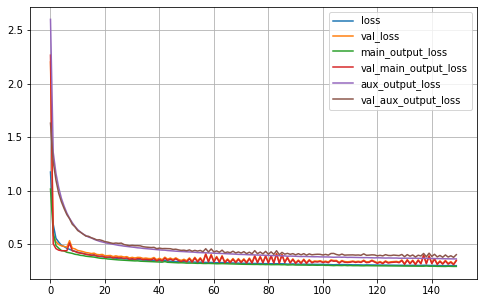

In [17]:
pd.DataFrame(history.history)[['loss', 'val_loss', 'main_output_loss', 'val_main_output_loss', 'aux_output_loss', 'val_aux_output_loss']].plot(figsize=(8,5))
plt.grid(True)
plt.show()

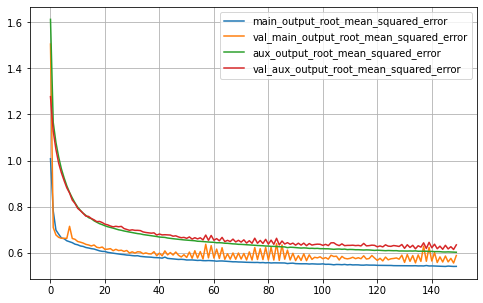

In [18]:
pd.DataFrame(history.history)[['main_output_root_mean_squared_error', 'val_main_output_root_mean_squared_error', 'aux_output_root_mean_squared_error', 'val_aux_output_root_mean_squared_error']].plot(figsize=(8,5))
plt.grid(True)
plt.show()

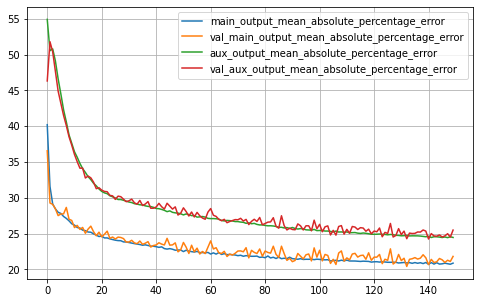

In [19]:
pd.DataFrame(history.history)[['main_output_mean_absolute_percentage_error', 'val_main_output_mean_absolute_percentage_error', 'aux_output_mean_absolute_percentage_error', 'val_aux_output_mean_absolute_percentage_error']].plot(figsize=(8,5))
plt.grid(True)
plt.show()

## Evaluate the model

In [20]:
mse_test = model.evaluate(
    {'wide_input': X_test_A, 'deep_input': X_test_B},
    {'main_output': y_test, 'aux_output': y_test}
)

162/162 [==============================] - 0s 496us/step - loss: 0.3304 - main_output_loss: 0.3227 - aux_output_loss: 0.3994 - main_output_root_mean_squared_error: 0.5681 - main_output_mean_absolute_percentage_error: 21.9546 - aux_output_root_mean_squared_error: 0.6320 - aux_output_mean_absolute_percentage_error: 25.6829
